In [1]:
import numpy as np
from math import sqrt
from skimage.color import rgb2gray
from skimage.io import imread
import cv2
from PIL import Image, ImageDraw
import matplotlib.pyplot as plt
from scipy import stats

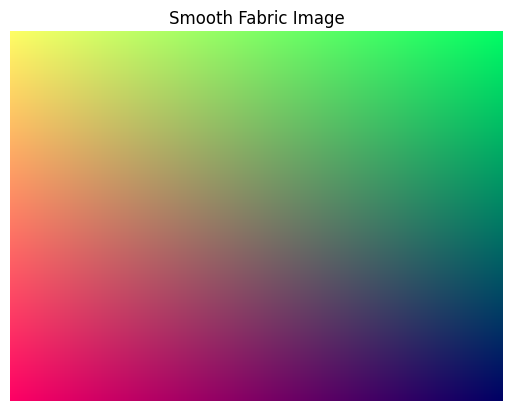

In [2]:

# Generate smooth fabric image
width, height = 800, 600
fabric_image = np.zeros((height, width, 3), dtype=np.uint8)

# Generate smooth fabric pattern
x = np.linspace(0, 1, width)
y = np.linspace(0, 1, height)
X, Y = np.meshgrid(x, y)

# Red channel
fabric_image[:,:,0] = (255 * (1 - X)).astype(np.uint8)

# Green channel
fabric_image[:,:,1] = (255 * (1 - Y)).astype(np.uint8)

# Blue channel
fabric_image[:,:,2] = 100

# Display fabric image
plt.imshow(fabric_image)
plt.title('Smooth Fabric Image')
plt.axis('off')
plt.show()


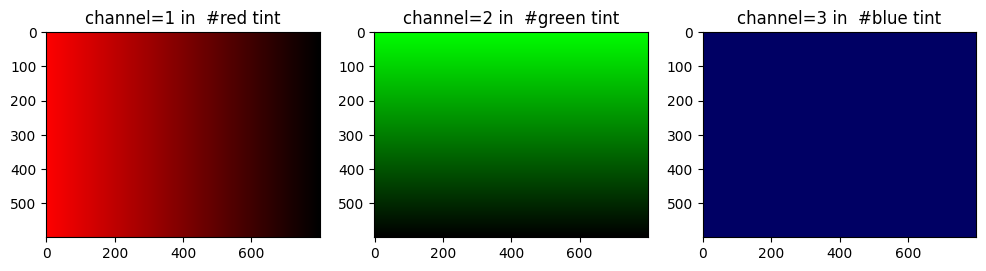

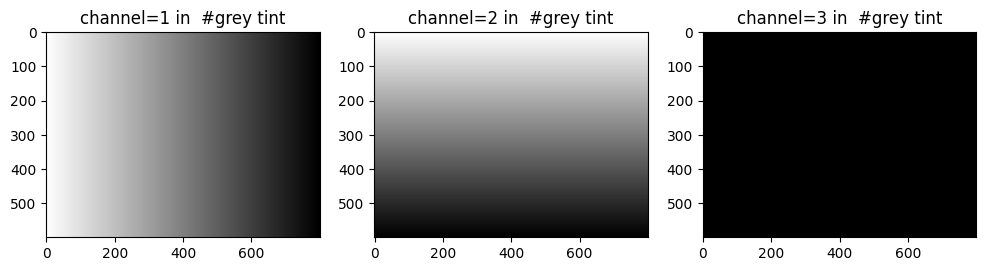

In [3]:
rgb_data = np.array(fabric_image)
tint_names = ["red", "green", "blue"]

plt.figure(figsize=(12,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    arr = np.zeros((3,), dtype='int')
    arr[i] = 1
    img1 = rgb_data*arr
    plt.title(f"channel={i+1} in  #{tint_names[i]} tint")
    plt.imshow(img1)

plt.figure(figsize=(12,5))
for i in range(3):
    plt.subplot(1, 3, i+1)
    img1 = rgb_data[:, :, i]
    plt.title(f"channel={i+1} in  #grey tint")
    plt.imshow(img1, cmap='gray')

In [4]:


img = rgb_data # Your image as a numpy array

cv2.imwrite("fabricImage.png", img)

True

(600, 800, 3)


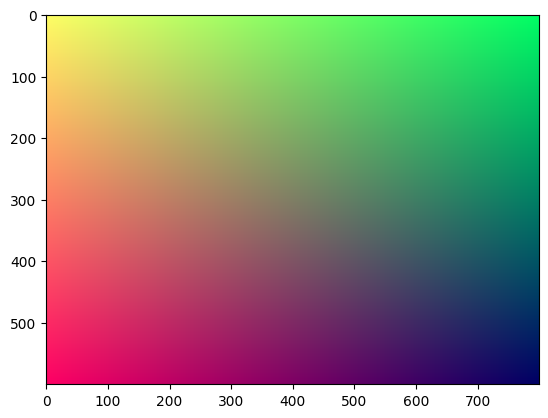

In [13]:
im = cv2.imread("fabricImage.png", cv2.IMREAD_COLOR)
print(im.shape)
plt.imshow(im)

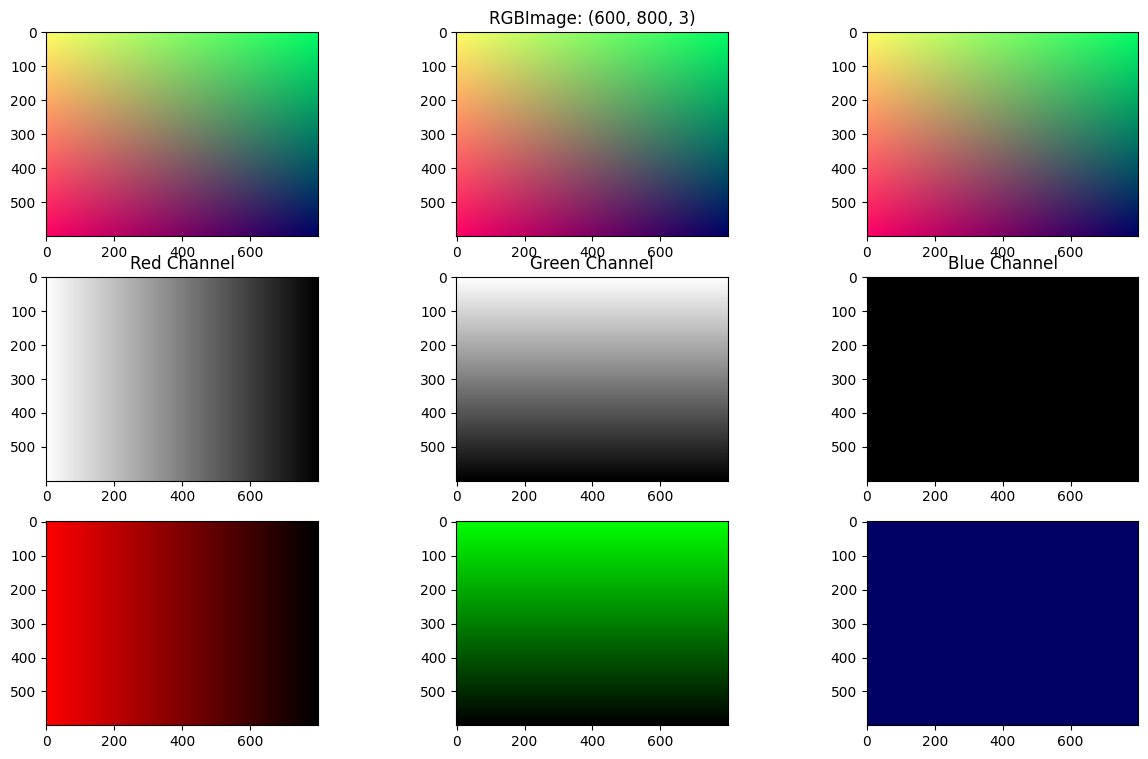

In [14]:
#Showing again the 3 channels but with a different method(same in lec)
im_gradient=im
im_gradient_red=im_gradient[:,:,0]
im_gradient_green=im_gradient[:,:,1]
im_gradient_blue=im_gradient[:,:,2]

fig, axs = plt.subplots(3,3)
axs[0,0].imshow(im_gradient, cmap=plt.get_cmap('gray')) #same image
axs[0,1].imshow(im_gradient, cmap=plt.get_cmap('gray')) #same
axs[0,1].set_title('RGBImage: '+str(im_gradient.shape))
axs[0,2].imshow(im_gradient, cmap=plt.get_cmap('gray')) #same

axs[1,0].imshow(im_gradient_red, cmap=plt.get_cmap('gray'))
axs[1,0].set_title('Red Channel')
axs[1,1].imshow(im_gradient_green, cmap=plt.get_cmap('gray'))
axs[1,1].set_title('Green Channel')
axs[1,2].imshow(im_gradient_blue, cmap=plt.get_cmap('gray'))
axs[1,2].set_title('Blue Channel')



im_gradient_redColored=np.zeros((im_gradient.shape[0], im_gradient.shape[1],3), dtype=int)
im_gradient_greenColored=np.zeros((im_gradient.shape[0], im_gradient.shape[1],3), dtype=int)
im_gradient_blueColored=np.zeros((im_gradient.shape[0], im_gradient.shape[1],3), dtype=int)

im_gradient_redColored[:,:,0]=im_gradient_red
im_gradient_greenColored[:,:,1]=im_gradient_green
im_gradient_blueColored[:,:,2]=im_gradient_blue

axs[2,0].imshow(im_gradient_redColored)
axs[2,1].imshow(im_gradient_greenColored)
axs[2,2].imshow(im_gradient_blueColored)

fig.set_size_inches(15, 9)

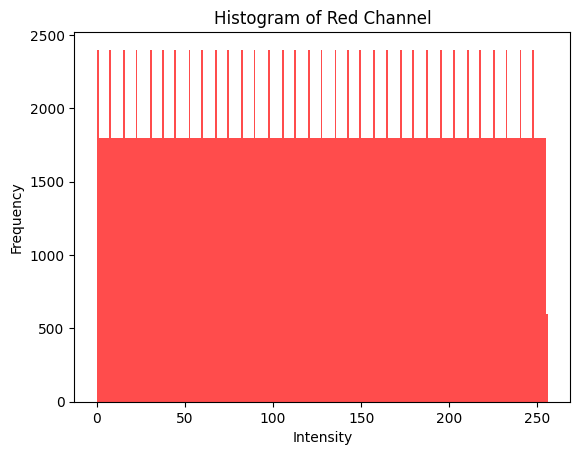

Mean of the red channel: 127.0025
Standard deviation of the red channel: 73.70847979540753
Mode of the red channel: 0
Frequency of the mode: 2400
Red channel Intensity Matrix: [[255 254 254 ...   0   0   0]
 [255 254 254 ...   0   0   0]
 [255 254 254 ...   0   0   0]
 ...
 [255 254 254 ...   0   0   0]
 [255 254 254 ...   0   0   0]
 [255 254 254 ...   0   0   0]]


In [18]:
# Plot histogram for the red channel
plt.hist(im_gradient_red.ravel(), bins=256, range=(0, 256), color='red', alpha=0.7)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Red Channel')
plt.show()
# Calculate mean and standard deviation of the red channel
red_mean = np.mean(im_gradient_red)
red_std = np.std(im_gradient_red)
red_mode, red_frequency = stats.mode(im_gradient_red.ravel())

print("Mean of the red channel:", red_mean)
print("Standard deviation of the red channel:", red_std)
print("Mode of the red channel:", red_mode)
print("Frequency of the mode:", red_frequency)
print("Red channel Intensity Matrix:",im_gradient_red)

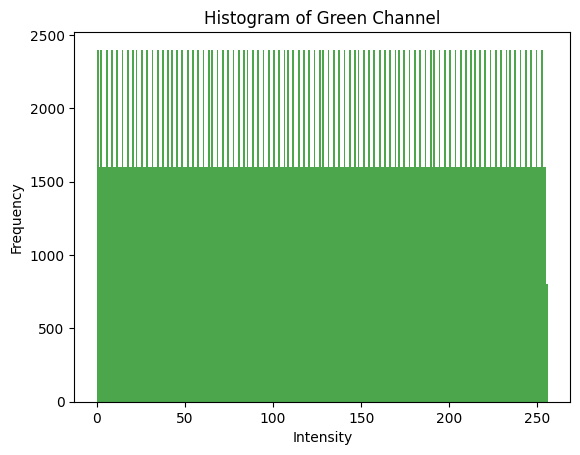

Mean of the green channel: 127.00166666666667
Standard deviation of the green channel: 73.73799335409724
Mode of the green channel: 0
Frequency of the mode: 2400
Green channel Intensity Matrix: [[255 255 255 ... 255 255 255]
 [254 254 254 ... 254 254 254]
 [254 254 254 ... 254 254 254]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


In [19]:
# Plot histogram for the green channel
plt.hist(im_gradient_green.ravel(), bins=256, range=(0, 256), color='green', alpha=0.7)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Green Channel')
plt.show()
# Calculate mean and standard deviation of the green channel
green_mean = np.mean(im_gradient_green)
green_std = np.std(im_gradient_green)
green_mode, green_frequency = stats.mode(im_gradient_green.ravel())

print("Mean of the green channel:", green_mean)
print("Standard deviation of the green channel:", green_std)
print("Mode of the green channel:", green_mode)
print("Frequency of the mode:", green_frequency)
print("Green channel Intensity Matrix:",im_gradient_green)

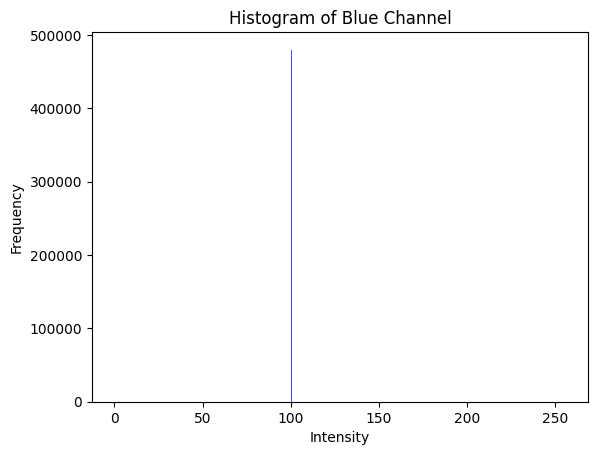

Mean of the blue channel: 100.0
Standard deviation of the blue channel: 0.0
Mode of the blue channel: 100
Frequency of the mode: 480000
Blue channel Intensity Matrix: [[100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 ...
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]
 [100 100 100 ... 100 100 100]]


In [20]:
# Plot histogram for the blue channel
plt.hist(im_gradient_blue.ravel(), bins=256, range=(0, 256), color='blue', alpha=0.7)
plt.xlabel('Intensity')
plt.ylabel('Frequency')
plt.title('Histogram of Blue Channel')
plt.show()
# Calculate mean and standard deviation of the blue channel
blue_mean = np.mean(im_gradient_blue)
blue_std = np.std(im_gradient_blue)
blue_mode, blue_frequency = stats.mode(im_gradient_blue.ravel())

print("Mean of the blue channel:", blue_mean)
print("Standard deviation of the blue channel:", blue_std)
print("Mode of the blue channel:", blue_mode)
print("Frequency of the mode:", blue_frequency)
print("Blue channel Intensity Matrix:",im_gradient_blue)